# Periodic sampling

Sampling is performed by applying a continuous signal to an analog-to-digital (A/D) converter whose output is a series of digital values.

## Aliasing: signal ambiguity in the frequency domain

There is a frequency-domain ambiguity associated with discrete-time signal samples that does not exist in the continuous signal world.
Suppose you were given the following sequence of values,
\begin{align*}
x(0) &= 0 \\
x(1) &= 0.866 \\
x(2) &= 0.866 \\
x(3) &= 0 \\
x(4) &= -0.866 \\
x(5) &= -0.866 \\
x(6) &= 0
\end{align*}
and were told that they represent instantaneous values of a time-domain sinewave taken at periodic intervals.
Next, you'd be likely to draw the sinewave, illustrated by the solid line, that passes thorugh the points representing the original sequence.
Another person, however, might draw the sinewave shown by the shaded line. 
The key issue is that, if the data sequence represented periodic samples of a sinewave, we cannot unambiguously determine the freqeuncy of the sinewave from those sample values alone.

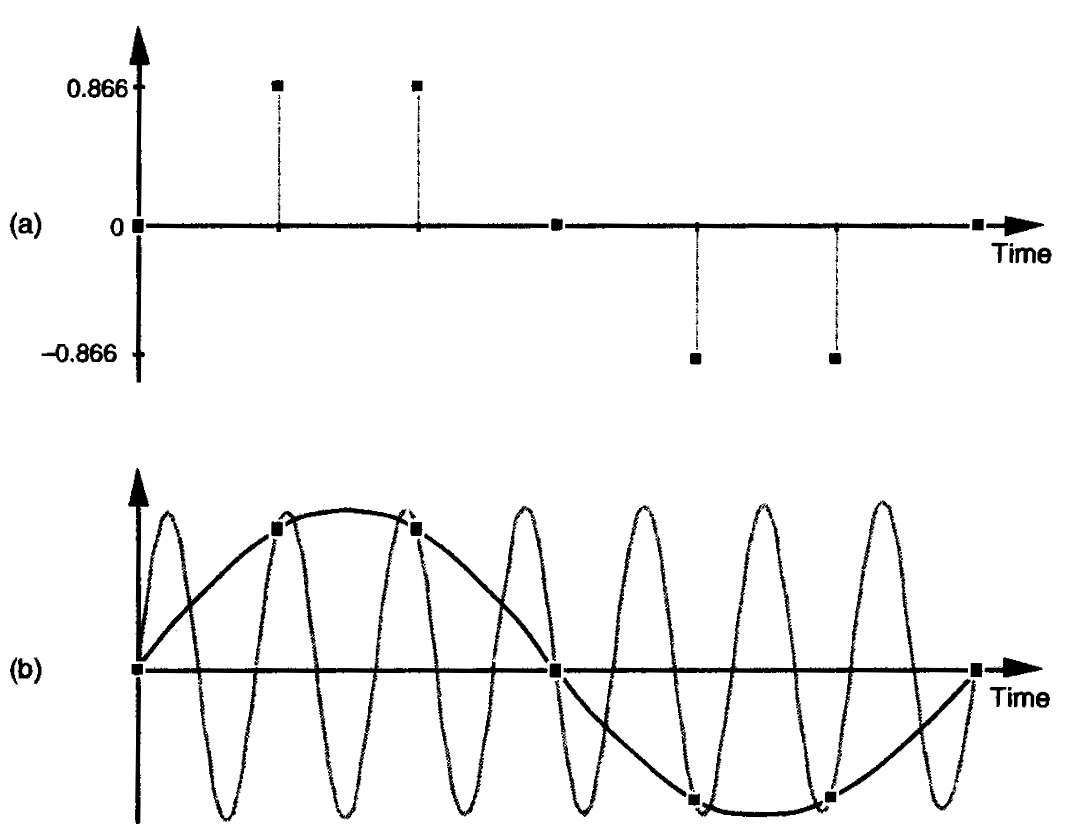

Consider the continuous time-domain sinusoidal signal defined as 
$$
x(t) = \sin(2\pi f_o t)
$$

The $x(t)$ signal is a garden variety sinewave whose frequency is $f_o$ Hz. Now let's sample $x(t)$ at a rate of $f_s$ samples/s, i.e., at regular periods of $t_s$ seconds where $t_s=1/f_s$.
\begin{align*}
\text{0th sample:} &x(0) = \sin(2\pi f_o 0 t_s) \\
\text{1st sample:} &x(0) = \sin(2\pi f_o 1 t_s) \\
\text{2nd sample:} &x(0) = \sin(2\pi f_o 2 t_s) \\
... \\
\text{nth sample:} &x(0) = \sin(2\pi f_o n t_s) \tag{2.2}
\end{align*}

Equantion 2.2 defines the value of the $n$th sample of our $x(n)$ sequence to be equal to the original sinewave at the time instant $n t_s$. Because two values of a sinewave are identical if they're separate by an integer multiple of $2\pi$ radians, i.e, $\sin(\phi)=\sin(\phi + 2\pi m)$ where $m$ is any integer, we can modify eq. 2.2 as
$$
x(n) = \sin(2\pi f_o n t_s) = \sin(2\pi f_o n t_s + 2\pi m) = \sin(2\pi (f_o + \frac{1}{32}) n t_s) \tag{2.3}
$$

If we let $m$ be an integer multiple of $n$, $m = kn$, we can replace the $m/n$ ration in Eq 2.3 with $k$ so that
$$
x(n) = \sin(2 \pi (f_o + \frac{k}{t_s})n t_s) \tag(2.4)
$$
Because $f_s = 1/t_s$, we can equante the x(n) sequences in Eq 2.2 and 2.4 as
$$
x(n) = \sin(2\pi f_o n t_s) = \sin(2\pi (f_o + f f_s)n t_s) \tag(2.5)
$$
The $f_o$ and $(f_o + k f_s)$ factors in Eq. 2.5 are therefore equal.
In other words, Eq. 2,5 states that

__When sampling at rate of $f_s$ samples/s, if $k$ is any positive or negative integer, we cannot distinguish between the sampled values of a sinewave of $f_o$ Hz and sinewave of $(f_o + k f_s)$ Hz.__ 

No sequence of values stored in a computer, for example, can unambiguously represent one and only one sinusoid without additional information. This fact applies equally to A/D converter output samples as well as signal samples generated by computer software routines. The sampled nature of any sequence of discrete vales makes that sequence also represent an infinite number of different sinusoids.

To illustrate the effects of Eq. 2.5, let's build on above figure and consider the sampling of a 7-kHz sinewave at a sample rate of 6kHz. A new sample is determined every 1/6000 seconds, or once every 167 microseconds, and their values are shown as the dots in below figure.
Notice that the sample values would not change at all if, instead, we are sampling at 1-kHz sinewave. In this example $f_o = 7kHz$,, $f_s = 6 kHz$, and $k = -1$ in Eq. 2.5, such that $f_o+kf_s=[7+(-1\ cdot 6)] = 1 kHz$. Our problem is that no processing scheme can determine if the sequence of sampled values, whose amplitudes are represented by the dots, came from a 7-kHz or a 1-kHz sinusoid.
If these amplitude values are applied to a digital process that detects energy at 1kHz, the detector output would indicate energy at 1kHz. But we know that there is no 1-kHz tone there - our input is a spectral pure 7-kHz tone. Equation 2.5 is causing a sinusoid, whose name is 7kHz, to go by the alias of 1kHz. 
Figure below shows another example of frequency ambiguity, that we'll call *aliasing*, where a 4-kHz could be mistaken for a -2kHz sinewave. If figure (b) below, $f_o = 4kHz$, $f_s = 6kHz$, and $k = -1$ in Eq. 2.5, so that $f_o+kf_s = [4+(-1 \cdot 6)] = -2 kHz$.Again, if we examine a sequence of numbers representing the dots in figure (b), we could not determine if the sampled sinewave was a 4-kHz tone or a -2kHz.

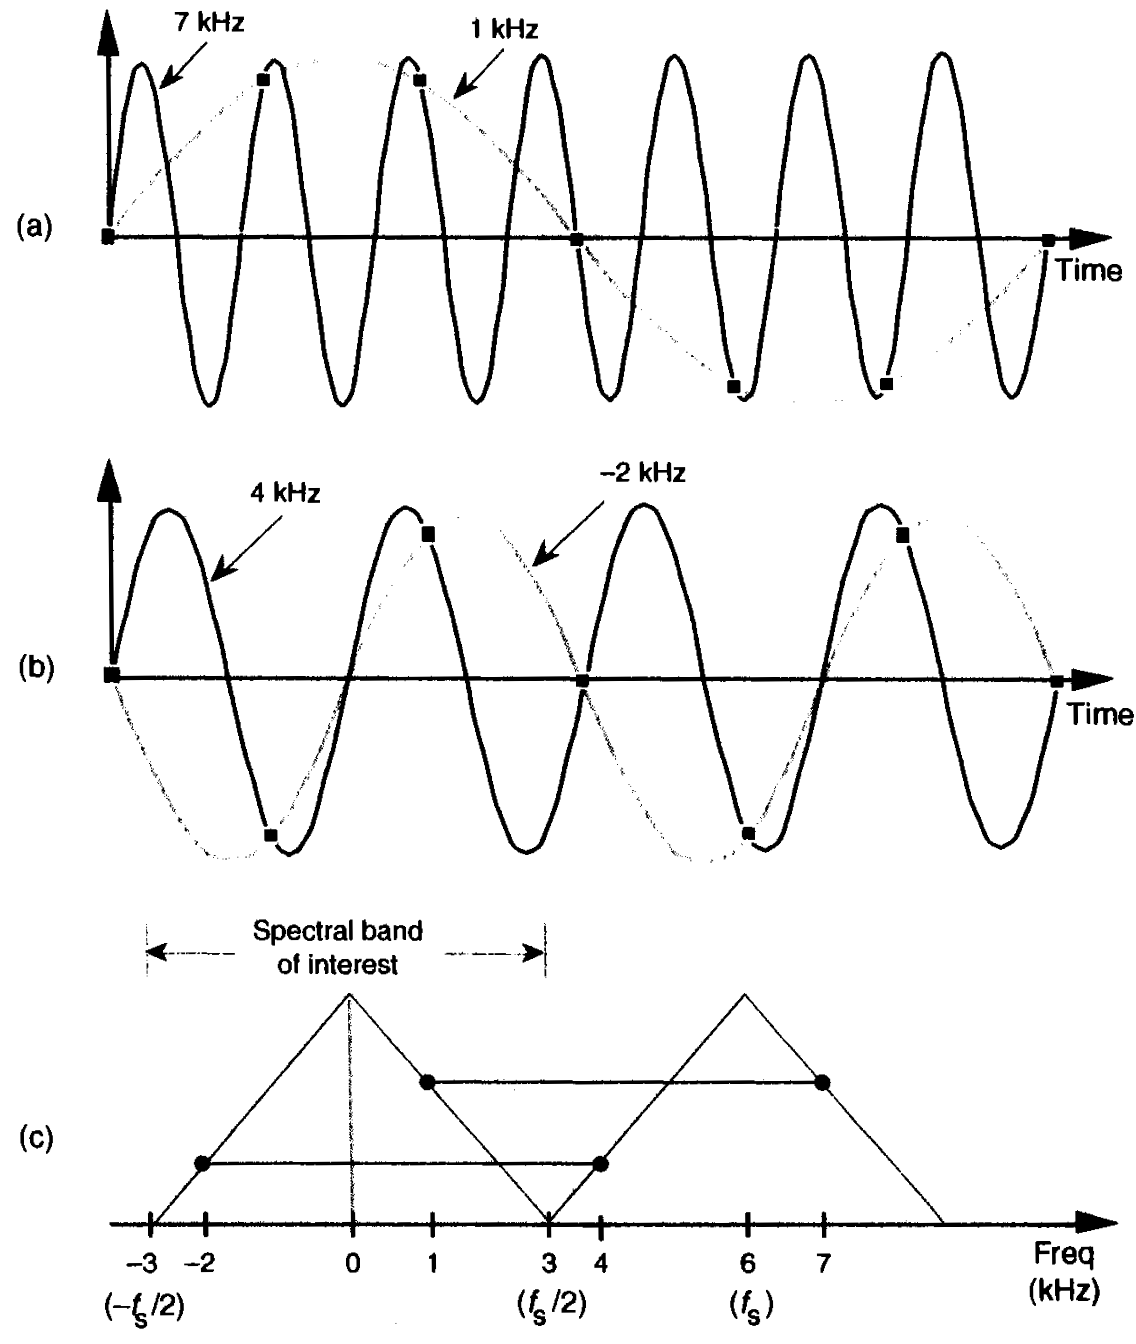

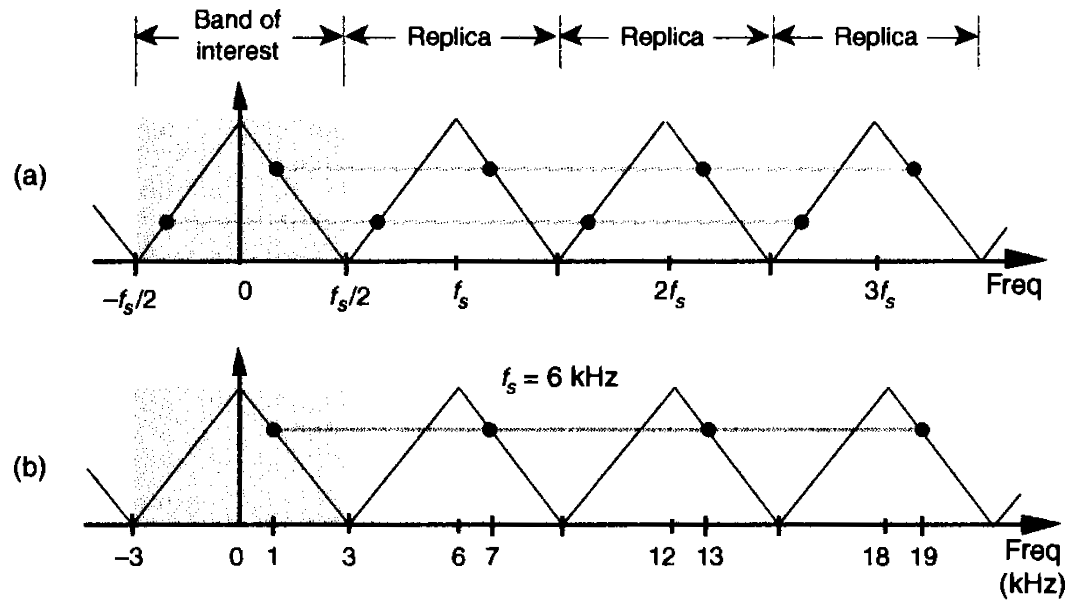


## Sampling Low-Pass Signals

Consider samping a continuous real signal whose spectrum is shown in figure (a) below. Notice that the spectrum is symmetrical about zero Hz, and the spectral amplitude is zero above +B Hz and below -B Hz, i.e., the signal is *band-limited*.

Given that the signal is sampled at a rate of $f_s$ samples/s, we can see the spectral replification effects of sampling in figure (b) below, showing the original spectrum in addition to an infinite number of replications, whose period fo replication is $f_s$ Hz.

Figure (a) is the spectrum of a continuous signal, a signal that can only exist in one of two forms. Either it's a continuous signal that can be sampled, through A/D conversion, or it is merely an abstract concept such as a mathematical expression for a signal. Once the signal is represented by a sequence of discrete sample values, its spectrum takes the replicated form of figure (b).

The replicated spectra are not just figments of the mathematics; they exist and have a profound effect on subsequent digital signal processing. The replications may appear harmless, and it's natural to ask "Why care about spectral replications? We're only interested in the frequency band within $\pm f_s/2$". Well, __if we perform a frequency translation operation or induce a change in sampling rate through decimation or interpolation, the spectral replications will shift up or down right in the middle of the frequency range of interest $\pm f_s/2$ and could cause problems.__
In practical A/D conversion schemes, $f_s$ is always greater than $2B$ to separate spectral replications at the *folding frequencies* of $\pm f_s/2$. This very important relationship of $f_s \ge 2B$ is known as the Nyquist criterion. If we lower $f_s = 1.5B$ Hz, the spectral result of this undersampling is illustrated in figure (c). The spectral replications are now overlapping the original baseband spectrum centered about zero Hz. The content in bands $-B$ to $-B/2$ and $B/2$ to $B$ are now corrupted by the spectral image replicated at $-f_s$ and $+f_s$.

This effect is particularly important when we're digitizing (A/D converting) continuous signals. It warns us that any signal energy located above $+B$ Hz and below $-B$ Hz in the original continuous spectrum of Figure (a) will always end up in the band of interest after sampling, regardless of the sample rate. For this reason, continuous (analog) low-pass filters are necessary in practice.

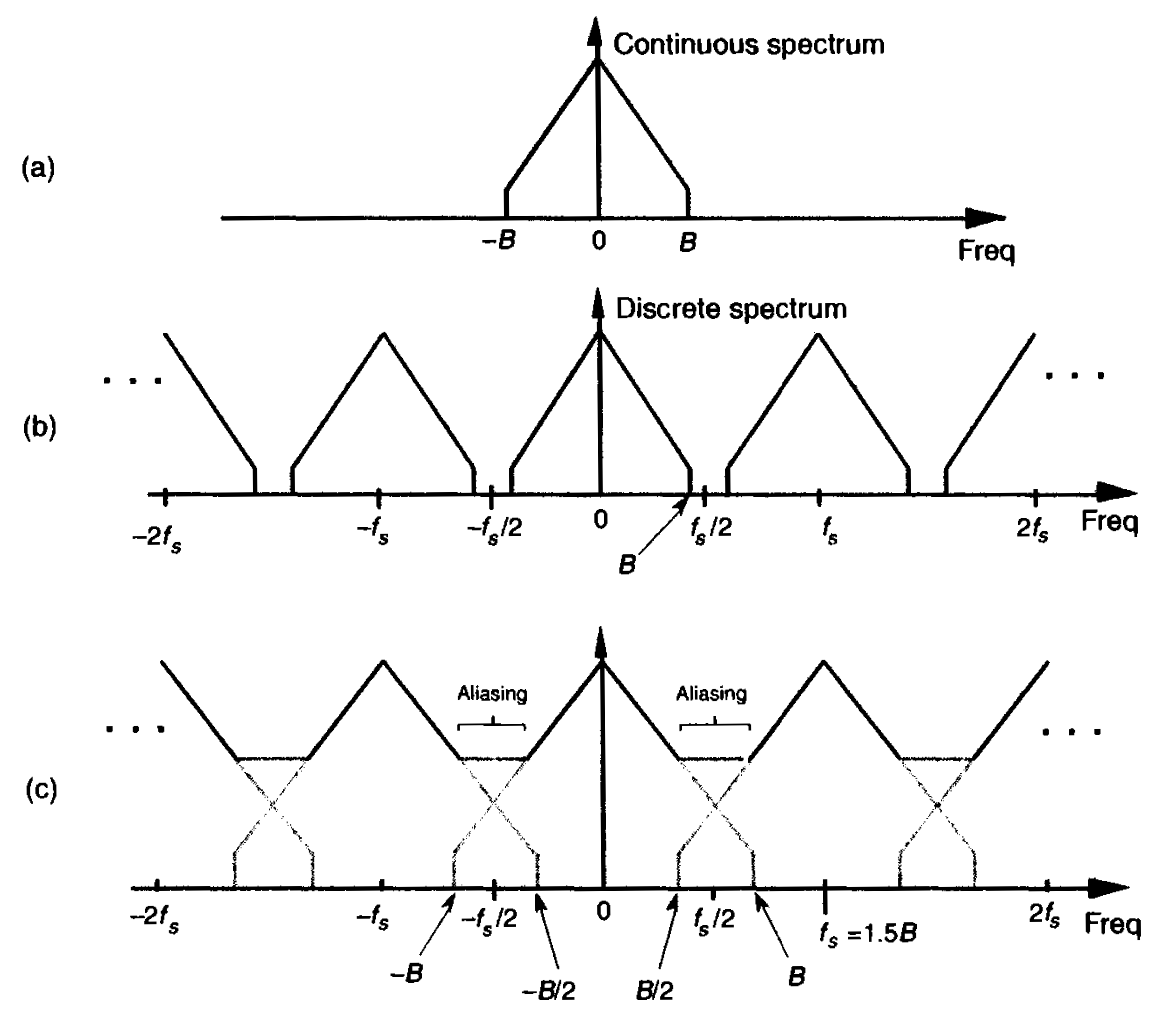

We illustrate this notion by showing a continuous signal of bandwidth B accompanied by noise energy in figure (a) below. Sampling this composite continuous signal at a rate that's greater than $2B$ prevents replications of the signal of interest from overlapping each other, but all of the noise energy still ends up in the range between $-f_s/2$ and $+f_s/2$ of our discrete spectrum shown in figure (b) below.

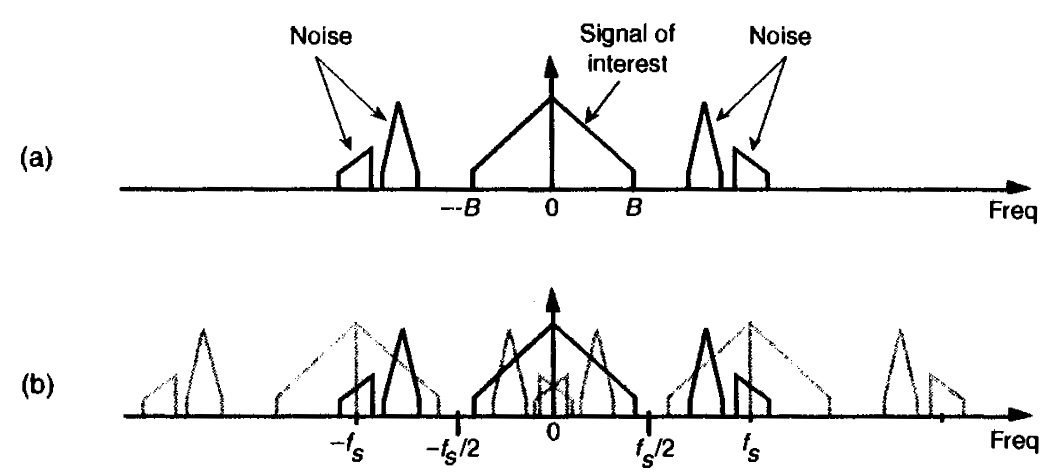

This problem is solved in practice by using an analog low pass anti-aliasing filter prior to A/D conversion to attenuate any unwanted signal energy above $+B$ and below $-B$ Hz as shown in figure below. Notice how the output spectrum of the low-pass filter has been band-limited, and spectral aliasing is avoided at the output of the A/D converter.

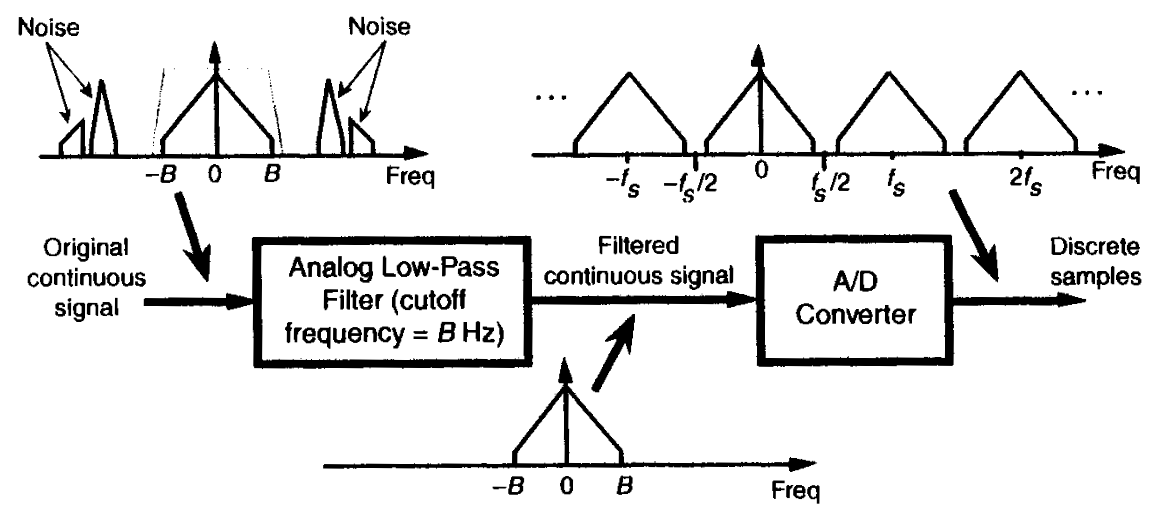

## Sampling bandpass signals

We can also use a technique known as bandpass sampling to sample a continuous bandpass signal that is centered about some frequence other than zero Hz. When a continuous input singal's bandwidth and center frequency permit us to do s, bandpass sampling not only reduces the speed requirement of A/D converters below that necessary with the traditional low-pass sampling; it also reduces the amount of digital memory necessary to capture a given time interval of a continuous signal.

By way of example, consider sampling the band-limited signal shwon in figure (a) below centered at $f_c = 20MHz$, with a bandwidth $B=5MHz$. We use the term bandpass sampling for the process of sampling continuous signals whose center frequencies have been translated up from zero Hz. What we're calling bandpass sampling goes by various other names in the literature, such as IF sampling, harmonic sampling, sub-Nyquist sampling, and undersampling.

In bandpass sampling, we're more concerned with a signal's bandwidth that its highest frequency component. Note that the negative frequency portion of the signal, centered at $-f_c$, is the mirror image of the positive frequency portion - as it must be for real signals.

Our bandpass signal's highest frequency component is 22.5MHz. Conforming to the Nyquist criterion (sampling at twice the highest frequency content of the signal) implies that the sampling frequency must be a minimum of 45 MHz. Consider the effect if the sample rate is 17.5MHz, show in figure (b) below. Note that the original spectral components remain located at $\pm f_c$, and spectral replications are located exactly at baseband, i.e., butting up against each other at zero Hz. Figure (b) shows that the sampling at 45MHz was unnecessary to avoid aliasing - instead we've used the spectral replicating effects of Eq. 2.5 to our advantage.

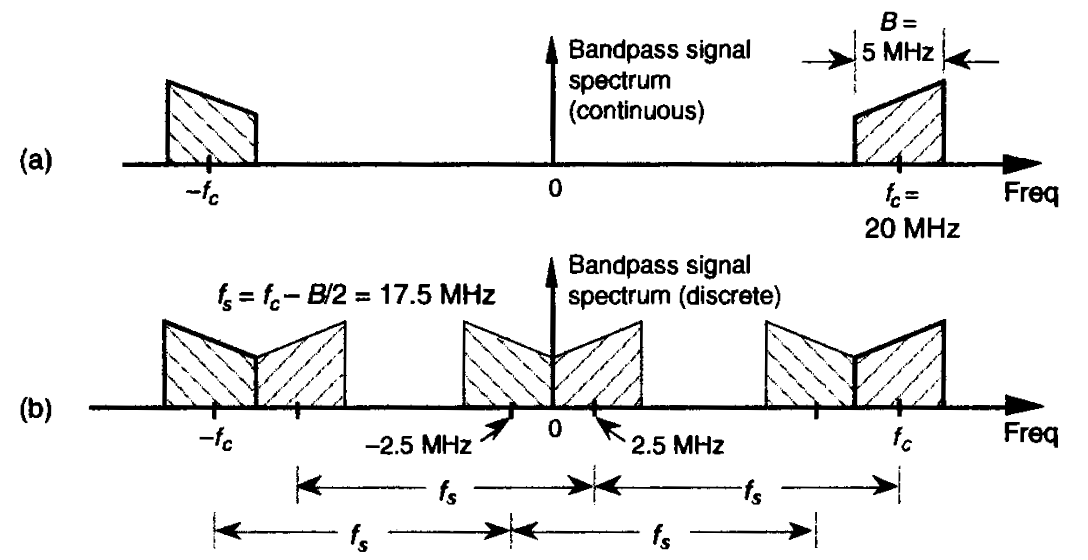

Bandpass sampling performs digitazion and frequency translation in a single process, often called *sampling translation*. The processes of sampling and frequency transliation are intimately bound together in the world of digital signal processing, every sampling operation inherently results in spectral replications.

Let's assume we have a continuous input bandpass signal of bandwidth B. Its *carrier frequency* is $f_c$ Hz, i.e, the bandpass signal is centered at $f_c$ Hz, and its sampled value spectrum is that shown in Figure (a) below. We can sample that continuous signal at a rate, say $f_s$ Hz, so the spectral replications of the positive and negative bands, Q and P, just butt up against each other exactly at zero Hz.
This situation, depicted in Figure (a) below, is reminiscent of Figure (b) above. With an arbitrary number of replications, say $m$, in the range of $2f_c-B$, we see that
$$
mf_s' = 2f_c - B \text{or} f_s'=\frac{2f_c-B}{m} \tag{2.6}
$$

In figure (a), m = 6 for illustrative purposes only. Of course $m$ can be any positive integer so long as $f_s$ is never less than $2B$. If the sample rate $f_s$ is increased, the spectra (bold) do not shift, but all the replications will shift. 

Thus, from Eq 2.6, for an arbitrary m, there is a frequency that the sample rate must not exceed, or

$$
f_s' \le \frac{2_fc-B}{m} \text{or} \frac{2f_c-B}{m} \ge f_s' \tag{2.7}
$$

If we reduce the sample rate below the $f_s$, value shown in Figure (a), the space between replications will decrease in the direction of the arrows in figure (b). Again, the original spectra do not shift when the sample rate is changed. At some new sample rate $f_s''$, where $f_s'' < f_s'$, the replication $P'$ will just butt up against the positive original spectrum centered at $f_c$ as shown in Figure (c). In this condition we know that
$$
(m+1)f_s'' = 2f_c + B \text{or} f_s''=\frac{2f_c+B}{m+1} \tag{2.8}
$$

Should $f_s''$ be decreased in value, P' will shift further down in frequency and starts to overlap with the positive original spectrum at $f_c$ and aliasing occurs. Therefore, from Eq. 2.8 and for $m+1$, there is a frequency that the sample rate must always exceed, or

$$
f_s'' \ge \frac{2f_c+B}{m+1} \tag{2.9}
$$

We can now combine Eq 2.7 and 2.9 to say that $f_s$ may be chosen anywhere in the range between $f_s''4 and $f_s'$, to avoid aliasing, or

$$
\frac{2f_c-B}{m} \ge f_s \ge \frac{2f_c+B}{m+1} \tag{2.10}
$$

where m is an arbitrary, positive integer ensuring that $f_s \ge 2B$. (For this type of periodic sapling of real signals, known as real or first order sampling, he Nyquist criterion $f_s \ge 2B$ must still be satisfied.)

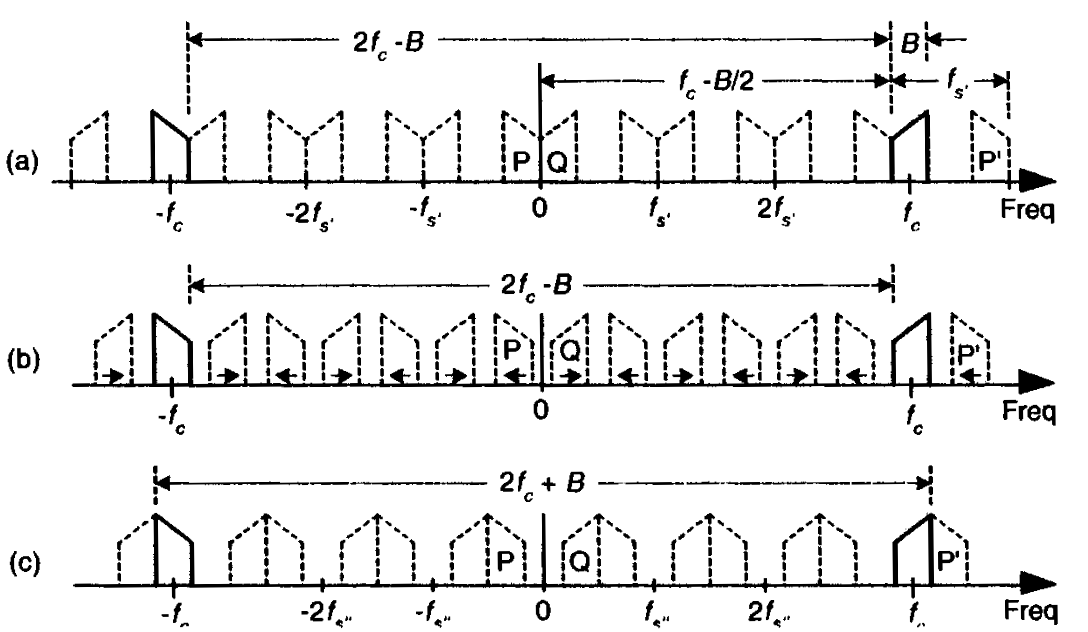

To appreciate the important relationships in Eq. 2.10, let's return to our bandpass signal example, where Eq. 2.10 enabes the generation of Table 2.1. This table tells us that our sample rate can be anywere in the range of 22.5 to 35MHz, anywhere in the range of 15 to 17.5 MHz, or anywhere in the range of 11.25 to 11.66 MHz. Any sample rate below 11.25MHz is unacceptable because it will not satisfy Eq 2.10 as well as $f_s \ge 2B$.

Notice in figure (f) that when $f_s$ equals to 7.5MHz ($m = 5$), we have aliasing problems because neither the greater relationship in Eq 2.0 nor $f_s \ge 2B$ have been satisfied.

The $m=4$ condition is also unnaceptable because $f_s \ge 2B$ is not satisfied.

The optimum sampling frequency is defined here as the frequency where spectral replications do not butt up against each other except at zero Hz. For example, in the m = 1 range of permissible sampling frequencies, it is much easier to perform subsequent digital filtering or other processing on the signal samples whose spectrum is that of Figure (b), as opposed to the spectrum in (a).

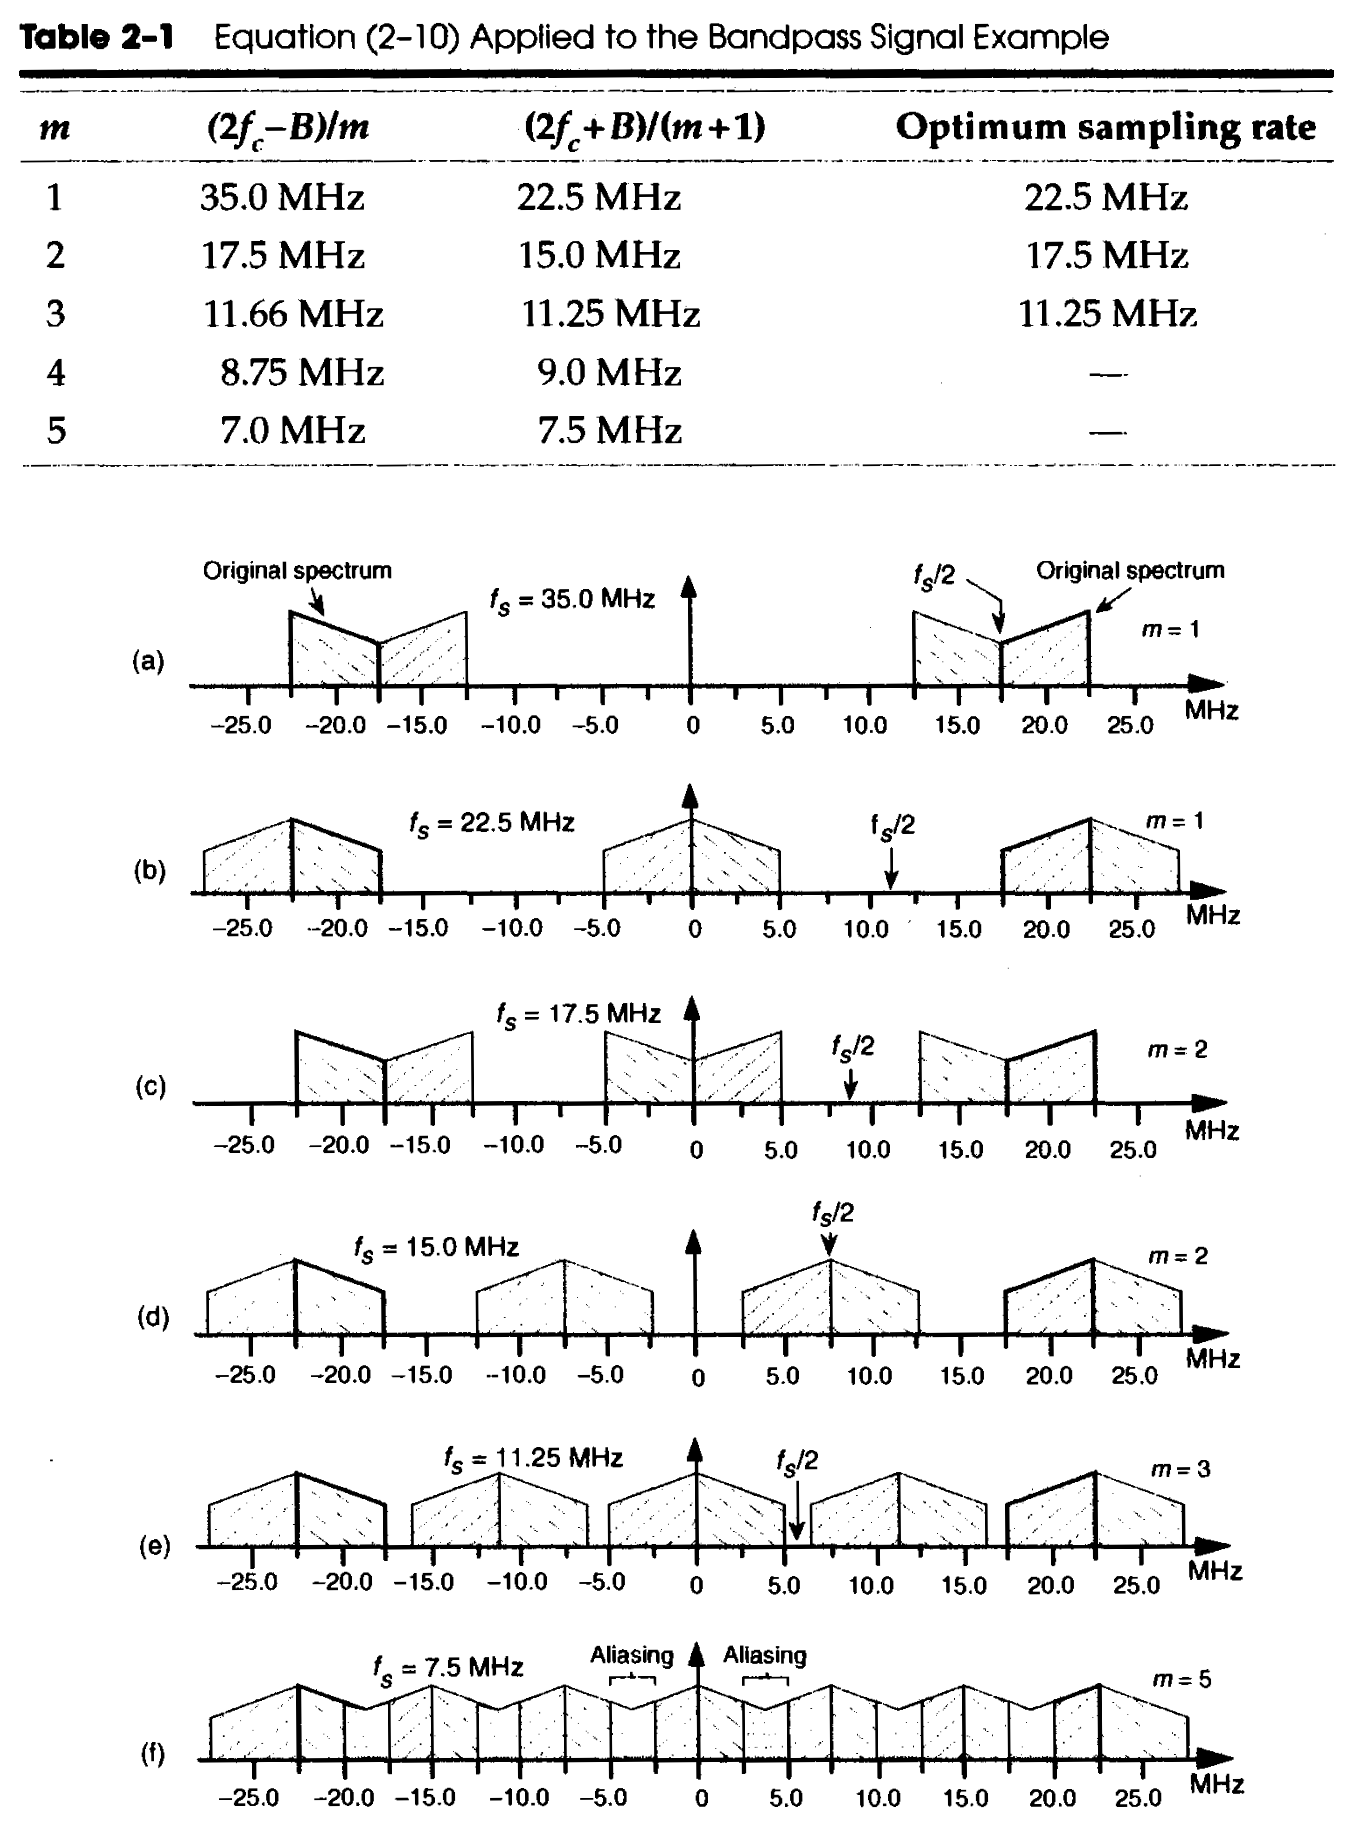

Non ideal analog bandpass filters, sample rate clock generator instabilities, and slight imperfections in available A/D converters make this ideal case impossible to achieve exactly. It's prudent to keep $f_s$ somewhat separated from the boundaries. Consider the bandpass scenario shwon in figure below. With a typical (non-ideal) analog bandpass filter, whose frequency response is indicated by the dashed line, it's prudent to consider the filter's bandwidth not as B, but as $B_{gb}$ in our equations. That is, we create a guard band on either side of our filter so that there can be a small amount of aliasing in the discrete specturm without distorting our desired signal, as shown at the bottom of the figure.

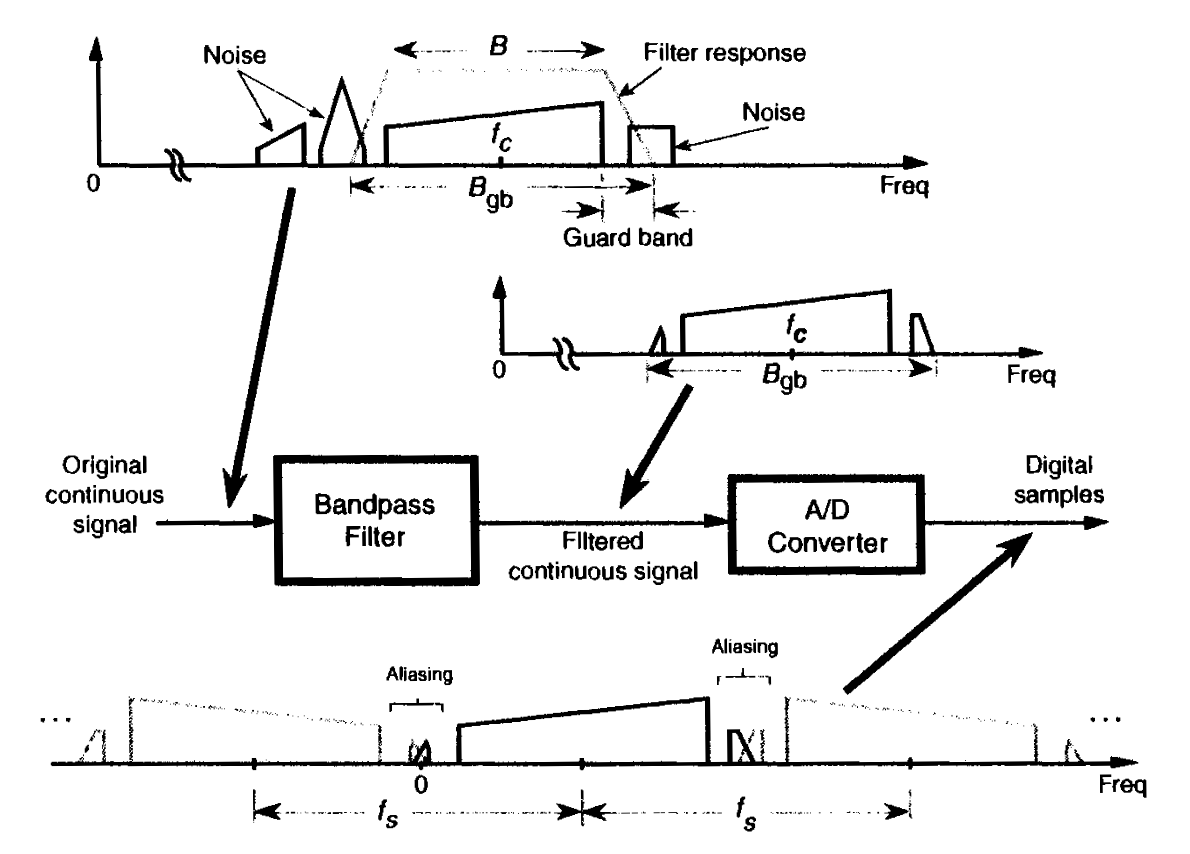

There are a couple of ways to make sure we're not operating near a boundary. One way is to set the sample rate in the middle of a white wedge for a given value of R. We do this by taking the average between the maximum and minimum sampe rate terms in Eq. 2.10 for a particular value of $m$, that is, to center the sample rate operating point within a wedge we use a sample rate of 
$$
f_{s_{cntr}} = \frac{1}{2}\cdot[\frac{2f_c-B}{m}+\frac{2f_c+B}{m+1}] = \frac{f_c-B/2}{m}+\frac{f_c+B}/2{m+1} \tag{2.12}
$$

Another way to avoid the boundaries is to use the following expressing to determine an intermediate $f_{s_i}$ operating point:
$$
f_{s_i} = \frac{4f_c}{m_{odd}} \tag{2.13}
$$
where $m_{odd}$ is an odd integer. Eq 2.13 yields the useful property that the sample signal of interest will be centered at one fourth the sample rate ($f_{s_i}/4$).
 

2B = 180.0 | f_min = 1536.6666666666667 | f_max = 1197.5 | f_opt = 230.5


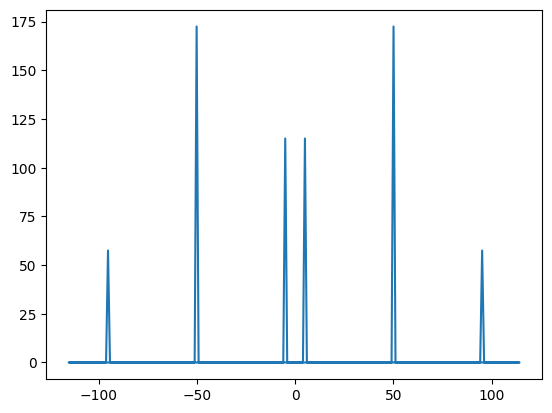

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# --- 1. Signal Parameters ---
fs = 230.5 # Sampling frequency
T = 1.0     # Duration of the signal (seconds)
N = int(fs * T) # Total number of samples
t = np.linspace(0, T, N, endpoint=False)    # Time vector

# Frequencies of the components in the signal
f_low = 2305.0     # Low frequency component (Hz)
f_mid = 2350.0    # Mid (desired) frequency component (Hz)
f_high = 2395.0  # High frequency component (Hz)

# --- 2. Create the signal ---
original_signal = (
    np.sin(2 * np.pi * f_low * t) +         # Low frequency noise
    1.5 * np.sin(2 * np.pi * f_mid * t) +   # Desired signal component
    0.5 * np.sin(2 * np.pi * f_high * t)    # High frequency noise
)

X = np.abs(((np.fft.fft(original_signal))))
freq = np.fft.fftfreq(N, 1/fs)

plt.Figure()
plt.plot(freq, X)

# --- 3. Acceptable ranges of fs for bandpass sampling
m = 3
B = (f_high-f_low)
# Acceptable ranges of fs for bandpass sampling
fs_min = (2*f_mid - B)/m
fs_max = (2*f_mid + B)/(m+1)
# Optimum sample rate to avoid spectral inversion
f_opt = (2*f_mid - B)/20

print(f"2B = {2*B} | f_min = {fs_min} | f_max = {fs_max} | f_opt = {f_opt}")